(reliability_index_example)=
# Reliability index $\beta$
In section {ref}`structural_safety` we have seen the definition of the reliability factor $\beta$, using a symbolic approach. Now, we will show some examples with values as well as python-implementation to produce graphs and show dynamic graphs. For the first example, we have chosen the average strength R to be $\mu_{R}=227$, and have assumed this strength has a normal distribution with standard deviation $\sigma_{R}=17.46$. The unit is not relevant for the example; it could be any unit of force or stress, as long as Effects E and Resistance R are expressed in the same unit. Now let's also assume this fictitious structure is loaded by some Effect E that results in force in stress in our structure. Of E we assume that its' average is $\mu_{E}=70$ and SD is $\sigma_{E}=23.5$. For the structure being sufficiently safe, E should be smaller than or equal to R with sufficiently high probability. 

```{figure} Images/E_R_curves_highgamma_uc0.81_Z_values.png
--- 
scale: 85%
name: E_R_Z_curves_example
---
E, R, and Z function with numerical example
```
We see that $\beta=5.36$, which, according to {numref}`Pf_vs_beta`, represents a probability of failure $P_f$ between $10^{-7}$ and $10^{-8}$. Now try for yourself:


````{card}
**Exercise**

If $\mu_E = 100$, $\sigma_E = 20$, $\mu_R = 240$ and $\sigma_R = 20$,
what are $\mu_Z$, $\sigma_Z$ and $\beta$?

You might want to download some code cells or the full .ipynb page and put code in there to perform the calculations, and plot the graphs.

```{Admonition} Solution
:class: dropdown, tip
$\mu_Z = \mu_R - \mu_E = 140$  
$\sigma_Z = \sqrt{\sigma_R^2 + \sigma_E^2} = 22.4$  
$\beta = \frac{\mu_Z}{\sigma_Z} = 6.3$
```
````

## Code to generate reliability function Z
Using the Python code below, you play with the numerical values yourself:

In [162]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [163]:
def plot_Z(meanE, sdE, meanR, sdR):
    
    # define lower and upper values of Effect E and Resistance R
    Elower = 0.5*meanE
    Eupper = 1.5*meanE
    E = np.arange(Elower, Eupper, 1)
    Rlower = 0.85*meanR
    Rupper = 1.15*meanR
    R = np.arange(Rlower, Rupper, 1)

    # Plot x-axis range with 1 steps
    x_axis = np.arange(-50, 450, 1)

    # figure size in inches
    plt.figure(figsize=(10, 6))

    # Calculating statistics
    probE = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdE ** 2))
    probErep = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdE) ** 2) / (2 * sdE ** 2))
    
    probR = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdR ** 2))
    probRrep = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdR) ** 2) / (2 * sdR ** 2))
        
    # calculation reliability function
    meanZ = meanR-meanE
    sdZ=math.sqrt(sdE**2+sdR**2)
    probZ=(1/(sdZ*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdZ**2))
    beta=meanZ/sdZ

    # plot normal distribution curves for E (blue) and R (red) and Z (green)
    plt.plot(x_axis, norm.pdf(x_axis, meanE, sdE), 'b')
    plt.plot(x_axis, norm.pdf(x_axis, meanR, sdR), 'r')
    plt.plot(x_axis, norm.pdf(x_axis, meanZ, sdZ), 'g')

    # plot averages with dash-dotted red/blue lines
    plt.plot([meanR, meanR], [0, probR], 'r-.')
    plt.plot([meanE, meanE], [0, probE], 'b-.')
    plt.plot([meanZ,meanZ],[0,probZ], 'g-.')
    
    plt.text(meanE + 5, probE, 'E', fontsize=15)
    plt.text(meanR + 5, probR, 'R', fontsize=15)
    plt.text(meanZ-10, probZ+0.001, 'Z=R-E', fontsize=15)

    # arrows for beta
    plt.plot([0,0],[0,probZ], 'k-.')
    plt.plot([0,meanZ],[0.75*probZ,0.75*probZ], 'k-')
    plt.plot([0,15],[0.75*probZ,0.80*probZ], 'k-')
    plt.plot([0,15],[0.75*probZ,0.70*probZ], 'k-')
    plt.plot([meanZ,meanZ-15],[0.75*probZ,0.80*probZ], 'k-')
    plt.plot([meanZ,meanZ-15],[0.75*probZ,0.70*probZ], 'k-')
    plt.text(meanZ/2, 0.8*probZ, "$\\mu_Z = \\beta \\cdot \\sigma_Z $", fontsize=10)
    plt.text(meanR*1.25, 0.8*probZ, "$\\mu_Z = \\mu_R - \mu_E =$ "+'{0:.1f}'.format(meanZ), fontsize=10)
    plt.text(meanR*1.25, 0.60*probZ, "$\\sigma_Z = \sqrt{\sigma_R^2 + \sigma_E^2} =$ "+'{0:.1f}'.format(sdZ), fontsize=10)
    plt.text(meanR*1.25, 0.40*probZ, "$\\beta = \\mu_Z / \\sigma_Z = $"+'{0:.2f}'.format(beta), fontsize=10, fontweight='bold')


    plt.xlabel("Reliability function Z")
    plt.ylabel("Probability")

    # plt.savefig("Z_curve.pdf", format="pdf", bbox_inches="tight")
    plt.show()


## Initializing example with data
Using the functions and numerical values defined above, now  plots can be generated:

In [164]:
meanE = 70
sdE = 23.52
meanR = 227
sdR = 17.46


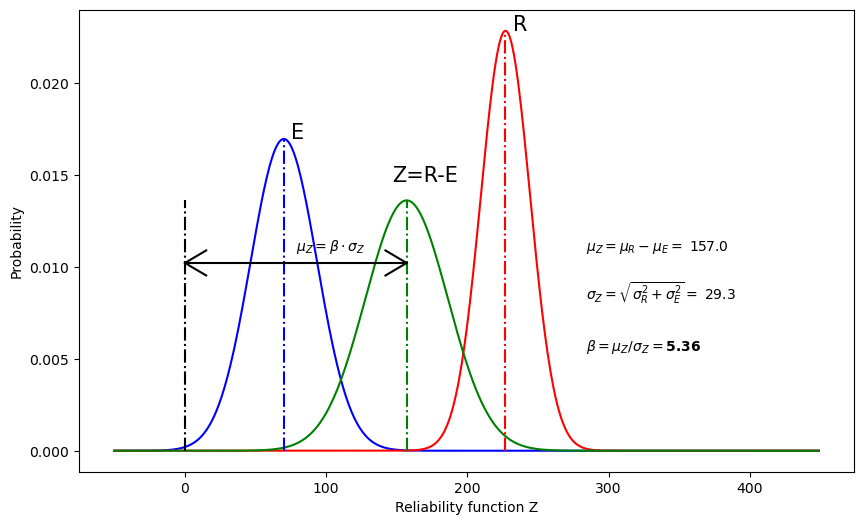

In [165]:
plot_Z(meanE, sdE, meanR, sdR)

In [166]:
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'notebook'


## Dynamic graphs of $\beta$ and u.c.
Using the dynamic graphs below, you can see what the influence is of modifying the values for $\mu_R$ or $\sigma_R$ on the magnitude of $\beta$ and the unity check u.c.:

In [167]:
## Colors
grey = '#eeeeee' # light grey fill

### Prepare all the graphs that are to be plotted
#### Define the range of densities to plot
range_elements = np.arange(0, 10, 1)
n_element = np.max(range_elements)

### Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

# x-axis range with 1 steps
x_axis = np.arange(-50, 450, 1)

meanE = 70
sdE = 23.52
gamma_E = 1.5

Elower = 0.5*meanE
Eupper = 1.5*meanE
E = np.arange(Elower, Eupper, 1)

probE = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdE ** 2))
probErep = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdE) ** 2) / (2 * sdE ** 2))
Ed = (meanE + 1.64 * sdE) * gamma_E
E_norm = norm.pdf(x_axis, meanE, sdE)

sdR = 17.75
gamma_R = 1.2
R_possibilities = np.arange(250, 350, 10)

## Add traces, one for each slider step
for i in range_elements: 

    meanR = R_possibilities[i]
    Rlower = 0.85*meanR
    Rupper = 1.15*meanR
    R = np.arange(Rlower, Rupper, 1)

    # Calculating statistics
    probR = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdR ** 2))
    probRrep = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdR) ** 2) / (2 * sdR ** 2))
    Rd = (meanR - 1.64 * sdR) / gamma_R   
    R_norm = norm.pdf(x_axis, meanR, sdR)

    # calculation reliability function
    meanZ = meanR-meanE
    sdZ=math.sqrt(sdE**2+sdR**2)
    probZ=(1/(sdZ*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdZ**2))
    Z_norm = norm.pdf(x_axis, meanZ, sdZ)
    beta=meanZ/sdZ
    UC=Ed/Rd

    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_axis,
            y=R_norm,
            line=dict(color='#0000CC'),
            mode='lines',
            name=f'\u03BC_R = {meanR:.2f}'))
    
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_axis,
            y=E_norm,
            line=dict(color='#CC0000'),
            mode='lines',
            name=f'\u03BC_E = {meanE:.2f}'))
    
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_axis,
            y=Z_norm,
            line=dict(color='#00CC00'),
            mode='lines',
            name=f'\u03BC_Z = {meanZ:.2f}'))
    
    fig.add_trace(
        go.Scatter(
            x=[0.05*np.max(x_axis)],  # Single x-coordinate for the text
            y=[0.023],  # Single y-coordinate for the text
            mode='text',  # Use 'text' mode to display text
            text=[f'UC={UC:.2f}'],  # Text to display
            textfont=dict(
                size=14,  # Font size
                color='#000000'  # Font color
            ),
            showlegend=False,  # Hide this trace from the legend
            textposition='middle right'))
    
    fig.add_trace(
        go.Scatter(
            x=[0.05*np.max(x_axis)],  # Single x-coordinate for the text
            y=[0.025],  # Single y-coordinate for the text
            mode='text',  # Use 'text' mode to display text
            text=[f'\u03B2={beta:.2f}'],  # Text to display
            textfont=dict(
                size=14,  # Font size
                color='#000000'  # Font color
            ),
            showlegend=False,  # Hide this trace from the legend
            textposition='middle right'))
    
    fig.add_trace(
        go.Scatter(
            x=[0.05*np.max(x_axis)],  # Single x-coordinate for the text
            y=[0.021],  # Single y-coordinate for the text
            mode='text',  # Use 'text' mode to display text
            text=[f'(for \u03B3E={gamma_E:.2f} and \u03B3R={gamma_R:.2f})'],  # Text to display
            textfont=dict(
                size=14,  # Font size
                color='#000000'  # Font color
            ),
            showlegend=False,  # Hide this trace from the legend
            textposition='middle right'))

traces_per_step = 6 # Number of traces per value of i

## Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 1
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

## Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=str(round(R_possibilities[i]))
    )
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": f"Resistance \u03BC_R = "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(range=[x_axis[0], x_axis[-1]])
fig.update_yaxes(title_text='Probability', range=[-0.001, 0.03])

fig.update_layout(
    title="Safety varying mean resistance ",
    sliders=sliders,
    legend_title="Legend"
)

fig.show()

The dynamic graph illustrates the following: if the average of the blue R-function shifts to a *lower* value, the reliability index $\beta$ becomes smaller, and the unity check becomes larger. If the average of the blue R-function shifts to a *higher* value, the reliability index $\beta$ becomes larger, and the unity check becomes smaller.

In [168]:
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'notebook'

In [169]:
## Colors
grey = '#eeeeee' # light grey fill

### Prepare all the graphs that are to be plotted
#### Define the range of densities to plot
range_elements = np.arange(0, 10, 1)
n_element = np.max(range_elements)

### Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

# x-axis range with 1 steps
x_axis = np.arange(-50, 450, 1)

meanE = 70
sdE = 23.52
gamma_E = 1.5

Elower = 0.5*meanE
Eupper = 1.5*meanE
E = np.arange(Elower, Eupper, 1)

probE = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdE ** 2))
probErep = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdE) ** 2) / (2 * sdE ** 2))
Ed = (meanE + 1.64 * sdE) * gamma_E
E_norm = norm.pdf(x_axis, meanE, sdE)

sdR_possibilities = np.arange(5, 55, 5)
gamma_R = 1.2

## Add traces, one for each slider step
for i in range_elements: 

    meanR = 350
    sdR = sdR_possibilities[i]
    Rlower = 0.85*meanR
    Rupper = 1.15*meanR
    R = np.arange(Rlower, Rupper, 1)

    # Calculating statistics
    probR = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdR ** 2))
    probRrep = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdR) ** 2) / (2 * sdR ** 2))
    Rd = (meanR - 1.64 * sdR) / gamma_R   
    R_norm = norm.pdf(x_axis, meanR, sdR)

    # calculation reliability function
    meanZ = meanR-meanE
    sdZ=math.sqrt(sdE**2+sdR**2)
    probZ=(1/(sdZ*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdZ**2))
    Z_norm = norm.pdf(x_axis, meanZ, sdZ)
    beta=meanZ/sdZ
    UC=Ed/Rd

    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_axis,
            y=R_norm,
            line=dict(color='#0000CC'),
            mode='lines',
            name=f'\u03BC_R = {meanR:.2f}'))
    
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_axis,
            y=E_norm,
            line=dict(color='#CC0000'),
            mode='lines',
            name=f'\u03BC_E = {meanE:.2f}'))
    
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_axis,
            y=Z_norm,
            line=dict(color='#00CC00'),
            mode='lines',
            name=f'\u03BC_Z = {meanZ:.2f}'))
    
    fig.add_trace(
        go.Scatter(
            x=[0.05*np.max(x_axis)],  # Single x-coordinate for the text
            y=[0.025],  # Single y-coordinate for the text
            mode='text',  # Use 'text' mode to display text
            text=[f'\u03B2={beta:.2f}'],  # Text to display
            textfont=dict(
                size=14,  # Font size
                color='#000000'  # Font color
            ),
            showlegend=False,  # Hide this trace from the legend
            textposition='middle right'))
    
    fig.add_trace(
        go.Scatter(
            x=[0.05*np.max(x_axis)],  # Single x-coordinate for the text
            y=[0.023],  # Single y-coordinate for the text
            mode='text',  # Use 'text' mode to display text
            text=[f'UC={UC:.2f}'],  # Text to display
            textfont=dict(
                size=14,  # Font size
                color='#000000'  # Font color
            ),
            showlegend=False,  # Hide this trace from the legend
            textposition='middle right'))
    
    fig.add_trace(
        go.Scatter(
            x=[0.05*np.max(x_axis)],  # Single x-coordinate for the text
            y=[0.021],  # Single y-coordinate for the text
            mode='text',  # Use 'text' mode to display text
            text=[f'(for \u03B3E={gamma_E:.2f} and \u03B3R={gamma_R:.2f})'],  # Text to display
            textfont=dict(
                size=14,  # Font size
                color='#000000'  # Font color
            ),
            showlegend=False,  # Hide this trace from the legend
            textposition='middle right'))


traces_per_step = 6 # Number of traces per value of i

## Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 1
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

## Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=str(round(sdR_possibilities[i])))
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": f"Resistance \u03C3_R= "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(range=[x_axis[0], x_axis[-1]])
fig.update_yaxes(title_text='Probability', range=[-0.001, 0.03])

fig.update_layout(
    title="Safety plot varying standard deviation resistance",
    sliders=sliders,
    legend_title="Legend"
)

fig.show()

The dynamic graph above illustrates the following: if the performance (capacity, resistance) of a material becomes more uncertain, e.g. due to a wider spread of test results of material properties or due to a wider spread of cross-sectional dimensions, $\sigma_R$ becomes larger. Even without change of the average value $\mu_R$, the safety of the structure will become lower (value of $\beta$ drops and u.c. increases). Vice versa, with smaller spread of R, safety will increase.